Assignment 4: Unsupervised Learning

Exercise 1: Clustering

In [1]:
###    Import all useful libraries
import numpy as np
import matplotlib.pyplot as plt
from kmeans import kmeans
from sklearn.preprocessing import normalize

It should be noted that since I made an individual py file to write codes for building kmeans (kmeans imported), so k number default is 2 since we are solving the problem of bisecting. But I can assign an different k number to put it in kmeans(), like kmeans(k = 5).

Define the function of calculate SSE in bisecting step (meaning only two centroids), but my function here can be used in any SSE calculation of clustering not just two centroids.

In [2]:
def sse(classes,centroids):
    sse = 0
    for cluster_index in classes:
        for features in classes[cluster_index]:
            sse += np.square(np.linalg.norm(features-centroids[cluster_index],axis=0))
    return sse

Define the bkmeans function now.

Note !!! kmeans() from scratch please see the .py file in this folder next to this jupyter notebook.

In [3]:
def bkmeans(X,k,iter):
    X = np.array(X)
    X_output = np.array(np.zeros((len(X),len(X[0])+1)))
    X_output[:,:len(X[0])] = X
    indices = np.array(np.arange(0,k,1))
    current_cluster = 1
    while current_cluster != k:
        choice = []
        sse_table = []
        for i in range(iter):
            km = kmeans()
            km.fitted_centroids(X)
            class_choice = km.classes
            centroids_choice = km.centroids
            SSE = sse(class_choice,centroids_choice)
            sse_table.append(SSE)
            choice.append(class_choice)
        iii = np.argmin(sse_table)
        classification = choice[iii]
        matrix = km.np_change(classification)
        count_0 = 0
        count_1 = 0
        for m in matrix:
            if m[len(m)-1] == 0:
                count_0 += 1
            else:
                count_1 += 1
        if count_0 >= count_1 :
            X = np.array(classification[0])
        else:
            X = np.array(classification[1])
        for xx in X_output:
            for xxx in X:
                if (xx[:len(X_output[0])-1]==xxx).all():
                    xx[len(X_output[0])-1] = indices[current_cluster]
        current_cluster += 1
    result = X_output[:,len(X_output[0])-1]
    return result

Use a randomly generated dataset to test the functionalitiy of the bkmeans built by the imported scratch kmeans.

Print the result of output n*1 vector with cluster indices for each of the n observations. Here n = 200.

The dataset X here used is the randomly generated data, k = 5, iter = 3.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 4. 3. 1. 1. 3. 1. 1. 3. 1. 1. 2. 2. 4. 1. 1. 1. 2. 2. 1. 4.
 2. 1. 1. 3. 2. 2. 4. 1. 4. 3. 1. 1. 1. 4. 2. 2. 1. 2. 2. 1. 4. 1. 2. 1.
 4. 2. 1. 4. 2. 2. 1. 2. 2. 1. 4. 1. 4. 4. 1. 4. 1. 4. 2. 2. 2. 1. 1. 1.
 2. 1. 4. 4. 2. 1. 2. 1. 1. 3. 4. 1. 4. 1. 4. 1. 1. 1. 4. 1. 1. 3. 1. 4.
 2. 4. 1. 3. 2. 1. 2. 1.]

Here index-0's number is shown.
The number of indices is: 100

Here index-1's number is shown.
The number of indices is: 44

Here index-2's number is shown.
The number of indices is: 26

Here index-3's number 

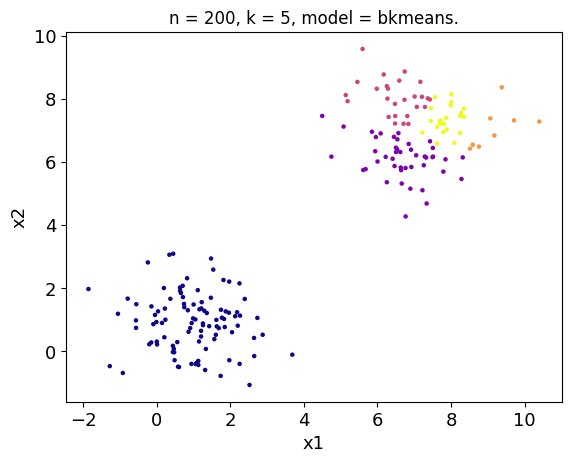

In [4]:
center_1 = np.array([1,1])
center_2 = np.array([7,7])
cluster_1 = np.random.randn(100,2) + center_1
cluster_2 = np.random.randn(100,2) + center_2
data = np.concatenate((cluster_1, cluster_2), axis = 0)
print("Print the result of output n*1 vector with cluster indices for each of the n observations. Here n = 200.")
print("")
print("The dataset X here used is the randomly generated data, k = 5, iter = 3.")
print("")
y=bkmeans(data,5,3)
print(y)
print("")
###    I also print out the number of every cluster in the output vector.
for i in range(5):
    print(f"Here index-{i}'s number is shown.")
    print(f"The number of indices is: {(y==i).sum()}")
    print("")
plt.figure()
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plt.scatter(data[:,0],data[:,1],c=y,cmap="plasma",s=5)
plt.title("n = 200, k = 5, model = bkmeans.")
plt.show()

Big notation here!!!

All the above print for the randomly generated dataset is for proving that my implementation of bkmeans class built by kmeans scratch is sucessful.

So logically it is extra part and is not answer.

But if you like and interested in it, you are welcome to see it and feel it.

The stand answer here for Exercise 1 is below, where kmeans class is written in another python file in this folder, please check it.

And when using kmeans class, it should be imported to the jupyter notebook here.

In [5]:
import numpy as np
from kmeans import kmeans
def sse(classes,centroids):
    sse = 0
    for cluster_index in classes:
        for features in classes[cluster_index]:
            sse += np.square(np.linalg.norm(features-centroids[cluster_index],axis=0))
    return sse
def bkmeans(X,k,iter):
    X = np.array(X)
    X_output = np.array(np.zeros((len(X),len(X[0])+1)))
    X_output[:,:len(X[0])] = X
    indices = np.array(np.arange(0,k,1))
    current_cluster = 1
    while current_cluster != k:
        choice = []
        sse_table = []
        for i in range(iter):
            km = kmeans()
            km.fitted_centroids(X)
            class_choice = km.classes
            centroids_choice = km.centroids
            SSE = sse(class_choice,centroids_choice)
            sse_table.append(SSE)
            choice.append(class_choice)
        iii = np.argmin(sse_table)
        classification = choice[iii]
        matrix = km.np_change(classification)
        count_0 = 0
        count_1 = 0
        for m in matrix:
            if m[len(m)-1] == 0:
                count_0 += 1
            else:
                count_1 += 1
        if count_0 >= count_1 :
            X = np.array(classification[0])
        else:
            X = np.array(classification[1])
        for xx in X_output:
            for xxx in X:
                if (xx[:len(X_output[0])-1]==xxx).all():
                    xx[len(X_output[0])-1] = indices[current_cluster]
        current_cluster += 1
    result = X_output[:,len(X_output[0])-1]
    return result

Exercise 2: Visualization of Results

Now I have downloaded three multivariate datasets with labels at the last column.

In [6]:
###    Use the following libraries to read arff files
import pandas as pd
from scipy.io import arff

First one is "Rice_0_1.arff", 7 features, 2 labels(classes), 3810 instances.

In [7]:
Rice = arff.loadarff("Rice_0_1.arff")
Rice = pd.DataFrame(Rice[0])
Rice["Class"] = Rice["Class"].astype(int)
Rice = np.array(Rice.iloc[:,:])
print("The following is the numpy array of the Rice Dataset.")
print("")
print(Rice)
print(Rice.shape)
Rice_X = normalize(Rice[:,:7],axis=0)
Rice_Y = Rice[:,7]

The following is the numpy array of the Rice Dataset.

[[1.52310000e+04 5.25578979e+02 2.29749878e+02 ... 1.56170000e+04
  5.72895527e-01 0.00000000e+00]
 [1.46560000e+04 4.94311005e+02 2.06020065e+02 ... 1.50720000e+04
  6.15436316e-01 0.00000000e+00]
 [1.46340000e+04 5.01122009e+02 2.14106781e+02 ... 1.49540000e+04
  6.93258822e-01 0.00000000e+00]
 ...
 [1.24370000e+04 4.42498993e+02 1.83572922e+02 ... 1.26450000e+04
  6.26738548e-01 1.00000000e+00]
 [9.88200000e+03 3.92296997e+02 1.61193985e+02 ... 1.00970000e+04
  6.59063637e-01 1.00000000e+00]
 [1.14340000e+04 4.04709991e+02 1.61079269e+02 ... 1.15910000e+04
  8.02949429e-01 1.00000000e+00]]
(3810, 8)


Second one is "fri_c1_1000_5.arff", 5 features, 2 labels(classes), 1000 instances.

In [8]:
fri = arff.loadarff("fri_c1_1000_5.arff")
fri = pd.DataFrame(fri[0])
fri["binaryClass"] = fri["binaryClass"].astype(int)
fri = np.array(fri.iloc[:,:])
print("The following is the numpy array of the fri Dataset.")
print("")
print(fri)
print(fri.shape)
fri_X = normalize(fri[:,:5],axis=0)
fri_Y = fri[:,5]

The following is the numpy array of the fri Dataset.

[[ 0.827613  0.874057 -0.269612  1.084659  0.80707   1.      ]
 [-1.050347 -0.809026 -1.189556  0.953911  0.778797  0.      ]
 [-0.089653  0.129047 -0.360108 -1.108125  0.066154  1.      ]
 ...
 [ 0.667684  1.317299 -0.940285 -0.1864    0.847608  1.      ]
 [-0.407723 -0.647654  0.412977  0.608623  1.295426  0.      ]
 [-1.04142  -1.02363   0.2817    1.188174  0.555133  0.      ]]
(1000, 6)


Third one is "wifi_localization.txt", 7 features, 4 labels(classes), 2000 instances.

In [9]:
wifi = np.genfromtxt("wifi_localization.txt",dtype=np.int32)
print("The following is the numpy array of the wifi Dataset.")
print("")
print(wifi)
print(wifi.shape)
wifi_X = normalize(wifi[:,:7],axis=0)
wifi_Y = wifi[:,7]

The following is the numpy array of the wifi Dataset.

[[-64 -56 -61 ... -82 -81   1]
 [-68 -57 -61 ... -85 -85   1]
 [-63 -60 -60 ... -85 -84   1]
 ...
 [-62 -59 -46 ... -87 -88   4]
 [-62 -58 -52 ... -90 -85   4]
 [-59 -50 -45 ... -88 -87   4]]
(2000, 8)


Part 2.1.: Comparison of DR Techniques

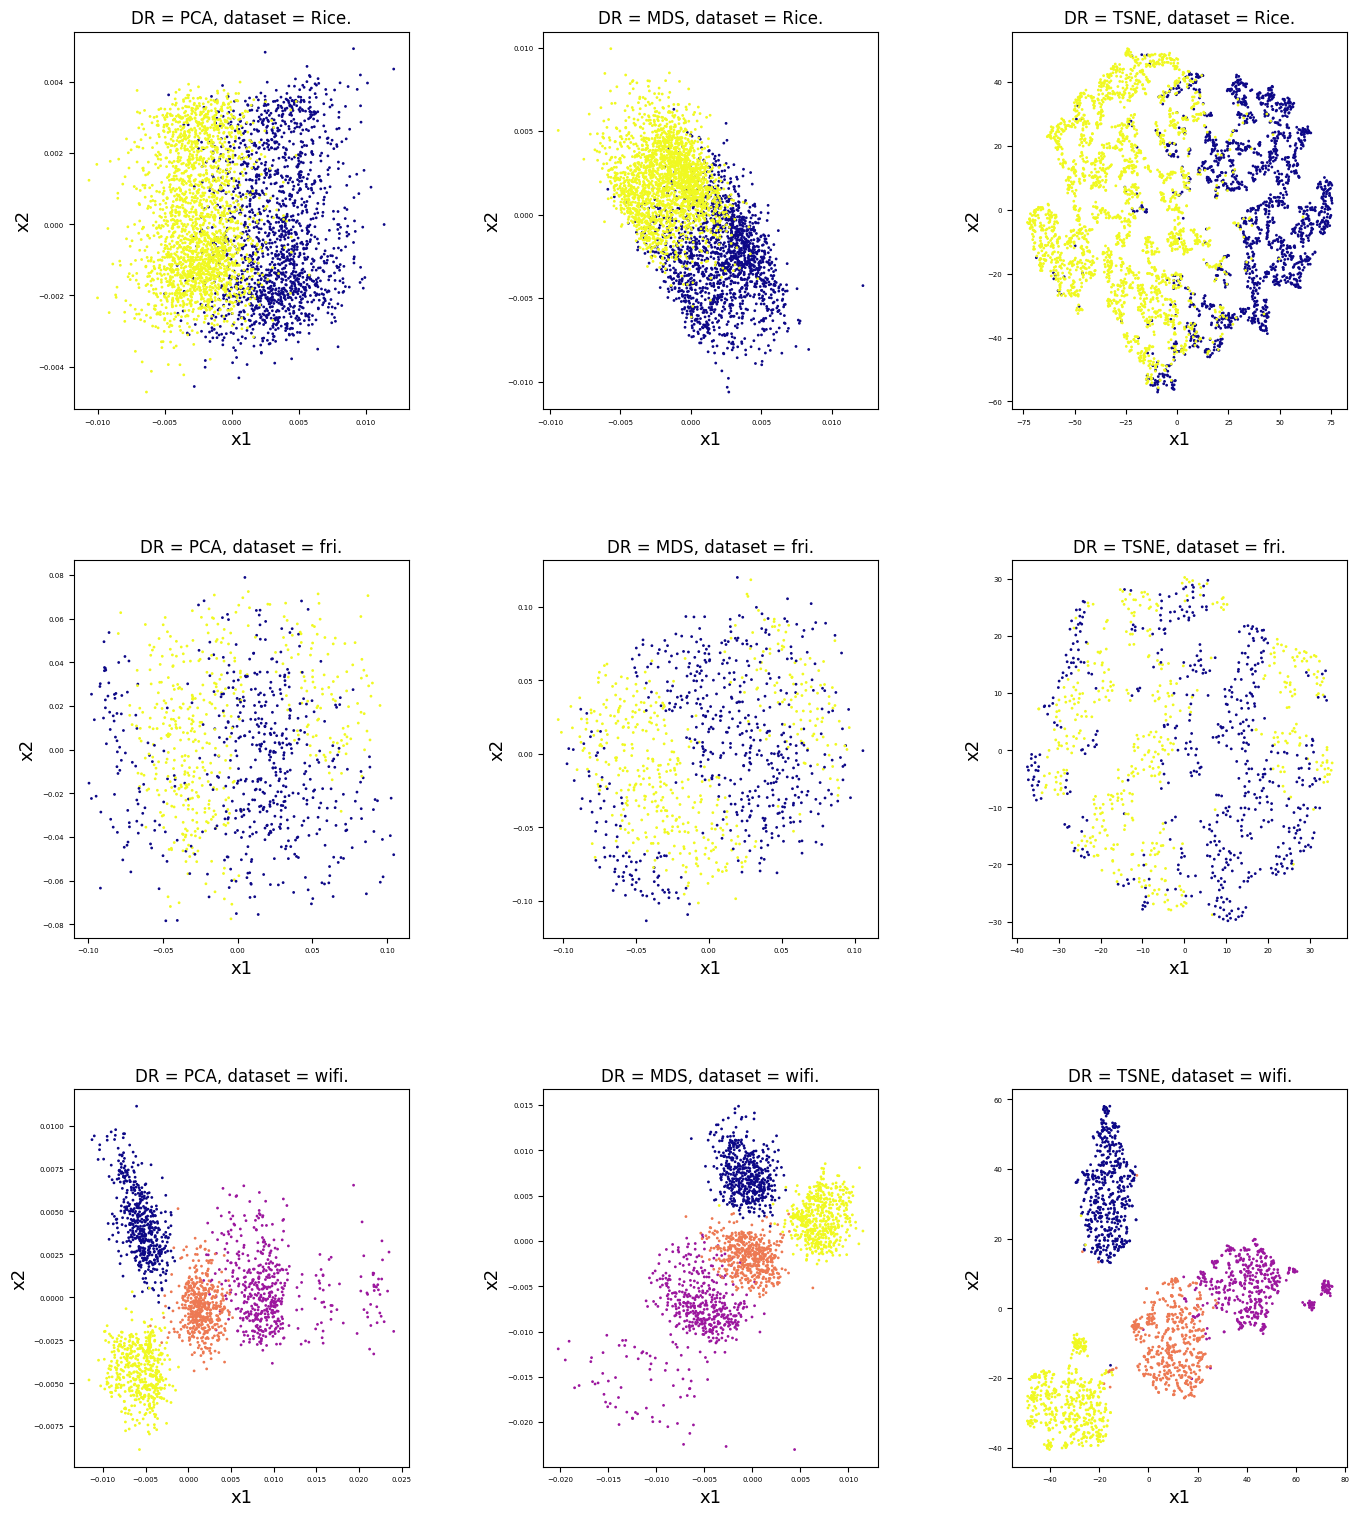

In [10]:
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
def plot_pca(X,Y):
    model = PCA(n_components=2)
    X_new = model.fit_transform(X)
    plt.scatter(X_new[:,0],X_new[:,1],c=Y,cmap="plasma",s = 1)
def plot_mds(X,Y):
    model = MDS(n_components=2)
    X_new = model.fit_transform(X)
    plt.scatter(X_new[:,0],X_new[:,1],c=Y,cmap='plasma',s = 1)
def plot_tsne(X,Y):
    model = TSNE(n_components=2)
    X_new = model.fit_transform(X)
    plt.scatter(X_new[:,0],X_new[:,1],c=Y,cmap="plasma",s = 1)
plt.figure()
plt.subplot(3,3,1)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_pca(Rice_X,Rice_Y)
plt.title(f"DR = PCA, dataset = Rice.")
plt.subplot(3,3,2)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_mds(Rice_X,Rice_Y)
plt.title(f"DR = MDS, dataset = Rice.")
plt.subplot(3,3,3)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_tsne(Rice_X,Rice_Y)
plt.title(f"DR = TSNE, dataset = Rice.")
plt.subplot(3,3,4)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_pca(fri_X,fri_Y)
plt.title(f"DR = PCA, dataset = fri.")
plt.subplot(3,3,5)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_mds(fri_X,fri_Y)
plt.title(f"DR = MDS, dataset = fri.")
plt.subplot(3,3,6)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_tsne(fri_X,fri_Y)
plt.title(f"DR = TSNE, dataset = fri.")
plt.subplot(3,3,7)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_pca(wifi_X,wifi_Y)
plt.title(f"DR = PCA, dataset = wifi.")
plt.subplot(3,3,8)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_mds(wifi_X,wifi_Y)
plt.title(f"DR = MDS, dataset = wifi.")
plt.subplot(3,3,9)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
plot_tsne(wifi_X,wifi_Y)
plt.title(f"DR = TSNE, dataset = wifi.")
plt.show()

Answer!!!: Regarding the separation of the classes:

a. for data "Rice": TSNE performs the best because you could see that in PCA and MDS although the classes are separated left and right, but in the middle part there are substantial amount of dot points overlapped. This means that in the middle dot points are mixed together in PCA and MDS. But generally the two classes here are separated clearly between left and right. And both classes separated in the same easiness.

b. for data "fri": for this dataset all three techniques perform relatively worse than the other two datasets, but if to choose I think MDS performs the best because in MDS model the dataset is separated into four parts from down left to upper right: blue-yellow-blue-yellow. But in other two models fri datasets's two classes are just mixed together. So generally both the two classes here are separated badly because there are no two fixed part for the blue and yellow classes. Both two classes are not easily separated.

c. for data "wifi": for this dataset TSNE performs the best because there are four clear colored areas without too many outliers, whereas in model PCA and MDS although there are also four clear colored areas but there are too many outliers and overlapped dots, especially between purple and orange dots and outliers in purple dots. But in TSNE four colored dots all very concentrated. Generally the four colored parts are separated effectively. And in the four colored classes yellow and blue colored classes are more easily separated than purple and orange colored classes.

Part 3.2.: Comparison of Clustering Techniques

Since TSNE performs better in multivariate numerical datasets, I choose T-SNE here.

In [11]:
###    Define the DR technique t-SNE
###    Process on the X matrix of the three datasets
def t_SNE(X):
    model = TSNE(n_components=2)
    X_new = model.fit_transform(X)
    return X_new
Rice_X_tSNE = t_SNE(Rice_X)
fri_X_tSNE = t_SNE(fri_X)
wifi_X_tSNE = t_SNE(wifi_X)

In [12]:
###    Import hierarchical clustering, where Agglomerative Clustering is the most common one
from sklearn.cluster import AgglomerativeClustering

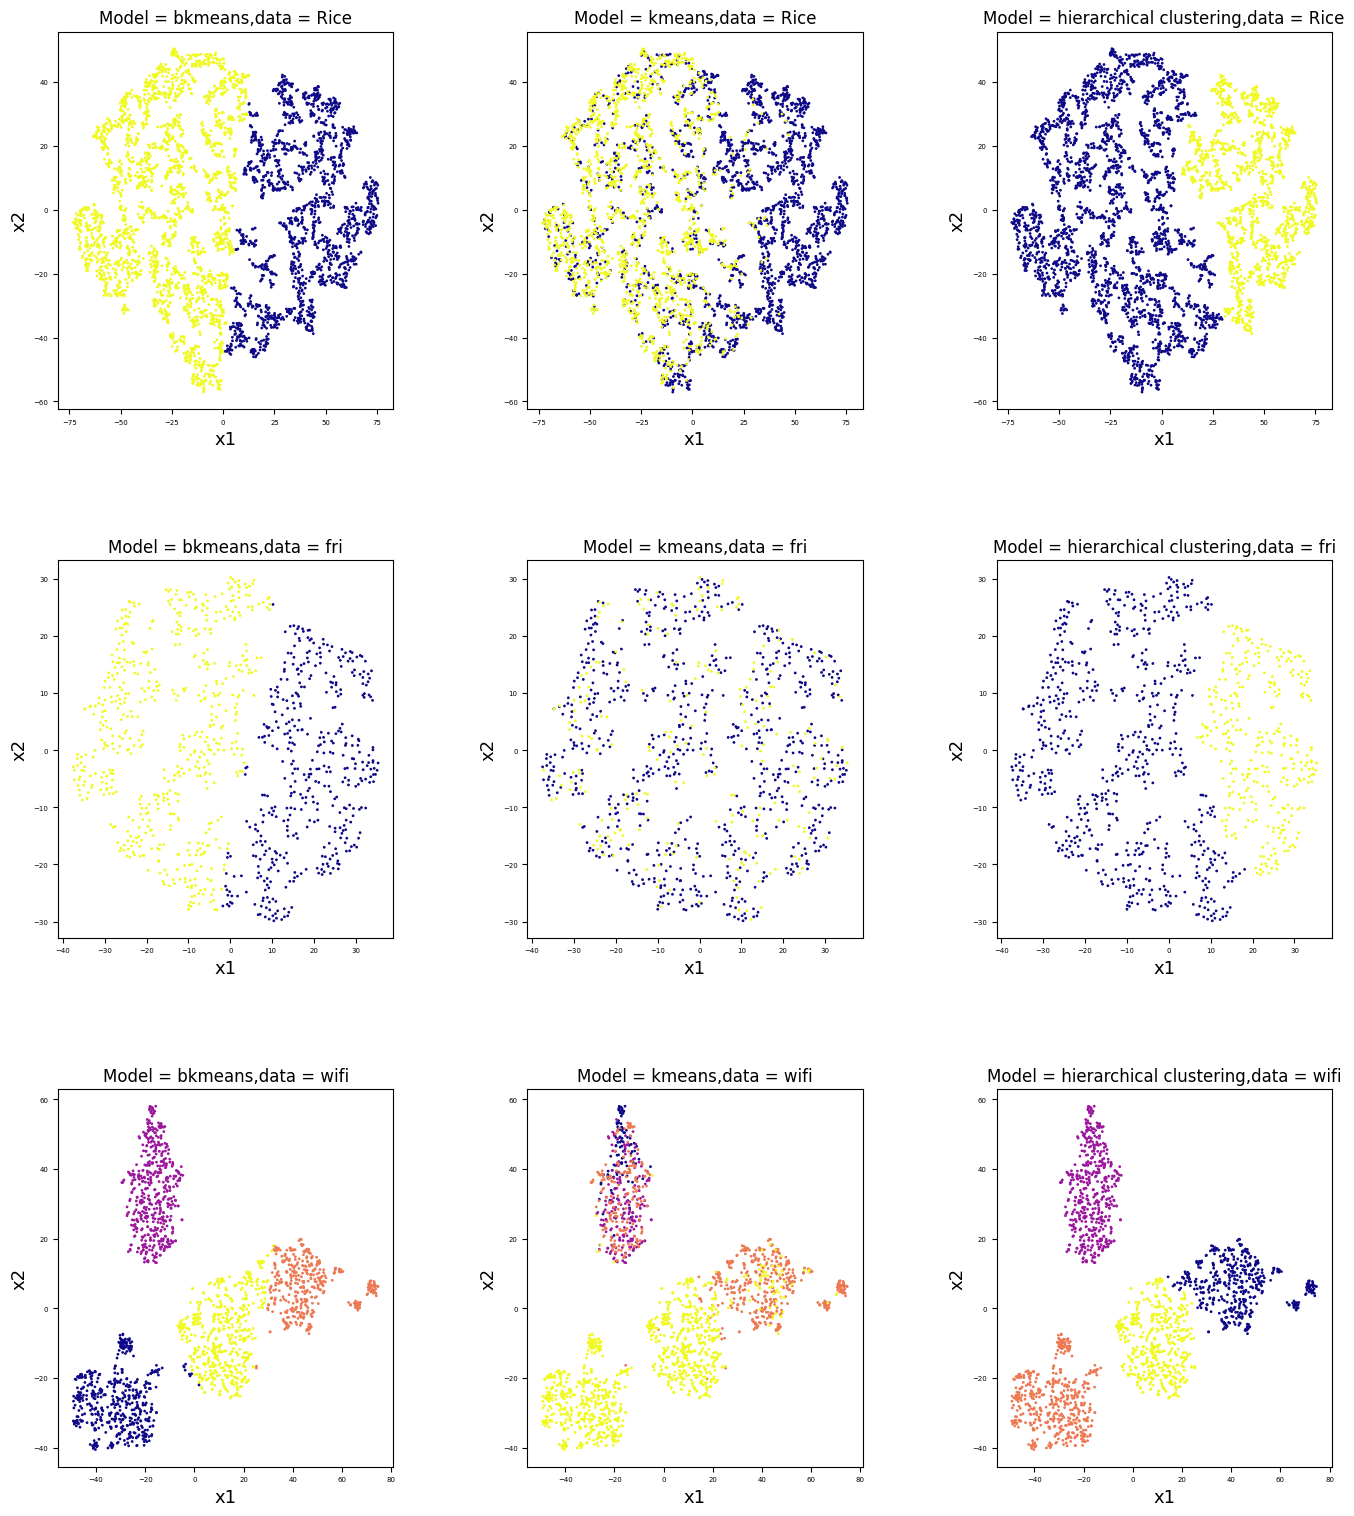

In [13]:
plt.figure()
plt.subplot(3,3,1)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
y = bkmeans(Rice_X_tSNE,2,3)
plt.scatter(Rice_X_tSNE[:,0],Rice_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = bkmeans,data = Rice")



plt.subplot(3,3,2)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
kk=2
model = kmeans(k=kk,tolerance = 0.001 , maximum_iteration = 500)
model.fitted_centroids(Rice_X_tSNE)
matrix = model.np_change(model.classes)
y = matrix[:,2]
plt.scatter(Rice_X_tSNE[:,0],Rice_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = kmeans,data = Rice")




plt.subplot(3,3,3)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
model = AgglomerativeClustering(n_clusters=2)
y = model.fit_predict(Rice_X_tSNE)
plt.scatter(Rice_X_tSNE[:,0],Rice_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = hierarchical clustering,data = Rice")




plt.subplot(3,3,4)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
y = bkmeans(fri_X_tSNE,2,3)
plt.scatter(fri_X_tSNE[:,0],fri_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = bkmeans,data = fri")



plt.subplot(3,3,5)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
kk=2
model = kmeans(k=kk,tolerance = 0.001 , maximum_iteration = 500)
model.fitted_centroids(fri_X_tSNE)
matrix = model.np_change(model.classes)
y = matrix[:,2]
plt.scatter(fri_X_tSNE[:,0],fri_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = kmeans,data = fri")



plt.subplot(3,3,6)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
model = AgglomerativeClustering(n_clusters=2)
y = model.fit_predict(fri_X_tSNE)
plt.scatter(fri_X_tSNE[:,0],fri_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = hierarchical clustering,data = fri")



plt.subplot(3,3,7)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
y = bkmeans(wifi_X_tSNE,4,3)
plt.scatter(wifi_X_tSNE[:,0],wifi_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = bkmeans,data = wifi")



plt.subplot(3,3,8)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
kk=4
model = kmeans(k=kk,tolerance = 0.001 , maximum_iteration = 500)
model.fitted_centroids(wifi_X_tSNE)
matrix = model.np_change(model.classes)
y = matrix[:,2]
plt.scatter(wifi_X_tSNE[:,0],wifi_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = kmeans,data = wifi")



plt.subplot(3,3,9)
plt.subplots_adjust(left=0.01, right=2, bottom=0.01, top=3, wspace=0.4, hspace=0.4)
plt.yticks(fontsize=5)
plt.xticks(fontsize=5)
plt.xlabel("x1",fontsize = 13)
plt.ylabel("x2",fontsize = 13)
model = AgglomerativeClustering(n_clusters=4)
y = model.fit_predict(wifi_X_tSNE)
plt.scatter(wifi_X_tSNE[:,0],wifi_X_tSNE[:,1],c=y,cmap='plasma',s=1)
plt.title(f"Model = hierarchical clustering,data = wifi")
plt.show()

Answer!!!: Regarding the separation of the clusters:

a. for dataset "Rice": I think bkmeans here performs the best, hierarchical clustering performs the second best and kmeans performs not very well. We can see that in bkmeans and hierarchical clustering yellow and blue clusters are separated clearly left and right, however in bkmeans yellow and blue clusters are more average, so bkmeans is the best. But in kmeans there are very many overlapped dots in the central part between yellow and blue clusters, so it is bad. Generally the yellow and blue two clusters are separated in the same easiness. But in kmeans the yellow clusters are more difficult to separate.

b. for dataset "fri": I think bkmeans here performs the best, hierarchical clustering performs the second best and kmeans performs not very well. We can see that in bkmeans and hierarchical clustering yellow and blue clusters are separated clearly left and right, however in bkmeans the decision boundary is a line but in hierarchical clustering it is a curve, so bkmeans is more clear and best. But in kmeans the two clusters are just mixed together, so it is bad. Generally the yellow and blue two clusters are separated in the same easiness. But in kmeans the yellow and blue two clusters are both difficult to separate.

c. for dataset "wifi": I think hierarchical clustering performs the best, kmeans performs average and bkmeans is a little bit weird. Here the hierarchical clustering is very successful with very clear four colored cluster groups, no overlap, no outliers and all four colored clusters are all very very easy to be separated. In k means it is average because there are also four colored cluster groups and no outliers, but between orange and purple clusters there are many overlapped dots. So here yellow and blue clusters are easy to separate, but purple and orange clusters are hard to separate. In bkmeans it is weird because although there are also four colored cluster group with no outliers and no overlaps, but the orange clusters are not concentrated and not dense and also very few, but blue are very many. So generally orange clusters are hard to separate, but all other three clusters are easy to separate.


Done.